In meetup006 we started with for loops before moving on to working with data to train a model using a dataset.
<br>
The data set can be found on https://www.kaggle.com/c/boston-housing/data or in the [slack](https://beginnerspython.slack.com/) channel #learning-to-code (send an email to skpyproject at gmail.com if you need access)
<br>
<br>
First you will need to import some libraries:
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

%matplotlib is a [magic function in IPython](https://ipython.readthedocs.io/en/stable/interactive/magics.html). 
<br>
Quoting the documentation:
<br>
       
       IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. 
       There are two kinds of magics, line-oriented and cell-oriented. 
       Line magics are prefixed with the % character and work much like OS command-line calls: 
       they get as an argument the rest of the line, where arguments are passed without parentheses or quotes. 
       Line magics can return results and can be used in the right hand side of an assignment. 
       Cell magics are prefixed with a double %%, and they are functions that get used as an argument not only the rest
       of the line, but also the lines below it in a separate argument.
       
    %matplotlib inline sets the backend of matplotlib to the 'inline' backend:

    With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
    directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

First, use [pandas](http://pandas.pydata.org/pandas-docs/version/0.24/) to load the training data.
<br>
To view a small sample of a data, use the .head() and .tail() methods. 
<br>
The default number of elements to display is five, but you can enter in a custom number.

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head(10)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


To examine the data, there is a list of functions you can explore [here](http://pandas.pydata.org/pandas-docs/stable/reference/frame.html).
<br>
<br>
.shape() can be used to find out how many rows and columns there are in the dataset

In [4]:
train.shape

(333, 15)

Since the ID column is not a useful data point, it can be removed using the .drop() function

In [5]:
train.drop("ID", axis=1, inplace=True)

In [6]:
train.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


A useful function to get a feel for the data is .describe() which gives you the mean, standard deviation, minimum and maximum values of each category to identify any outliers. 

In [7]:
train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
train.info

<bound method DataFrame.info of          crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
3     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
4     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
5     0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
6     0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
7     0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311   
8     0.62976   0.0   8.14     0  0.538  5.949   61.8  4.7075    4  307   
9     0.63796   0.0   8.14     0  0.538  6.096   84.5  4.4619    4  307   
10    0.62739   0.0   8.14     0  0.538  5.834   56.5  4.4986    4  307   
11    1.05393   0.0   8.14     0  0.538  5.935   29.3  4.4986    4  

In [9]:
train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

But since charts make it easier for identifying outliers, you can use pandas to graphically visualise the data using the function .hist function to graph [histograms](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html#pandas.DataFrame.hist).

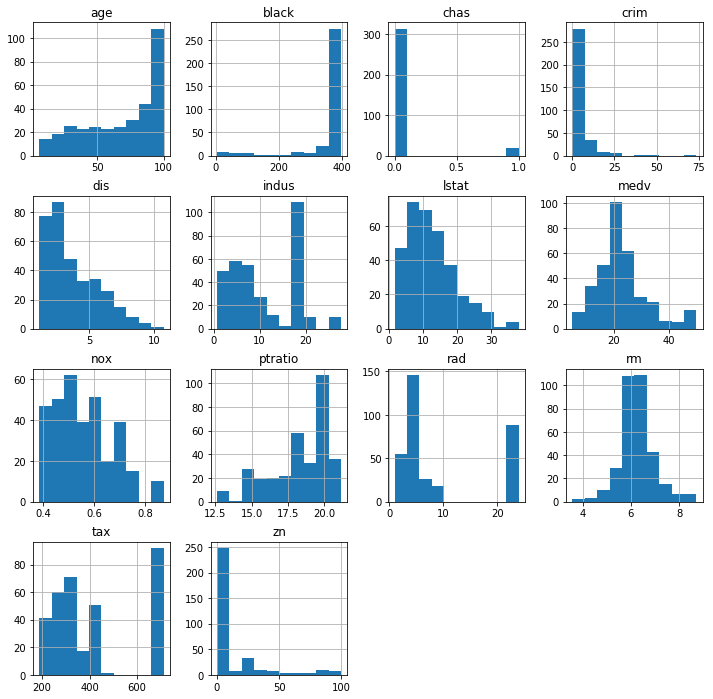

In [10]:
train.hist(figsize=(12,12));

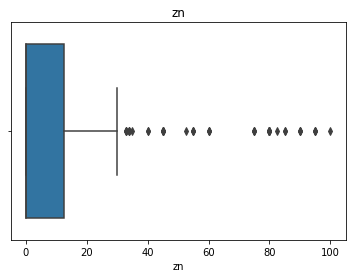

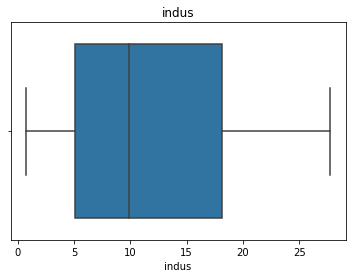

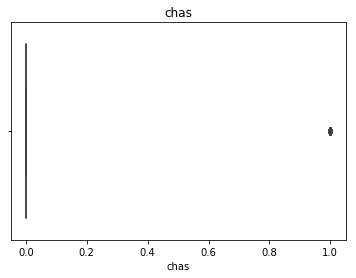

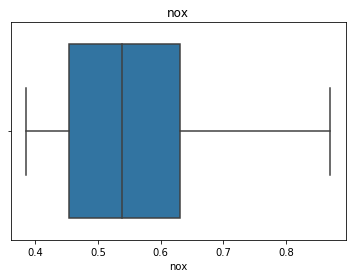

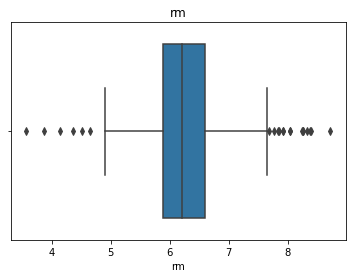

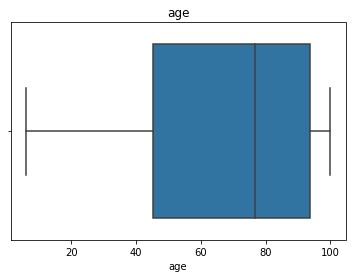

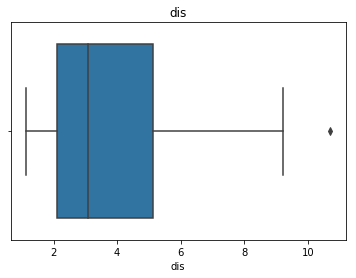

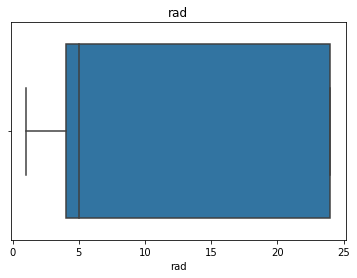

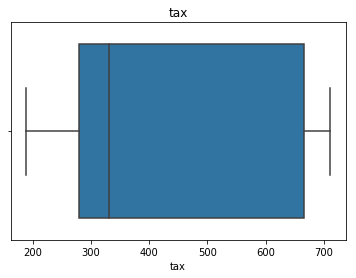

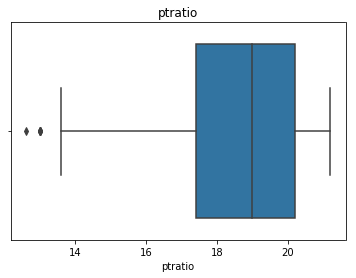

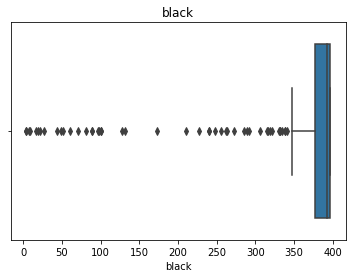

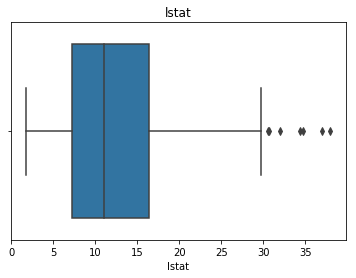

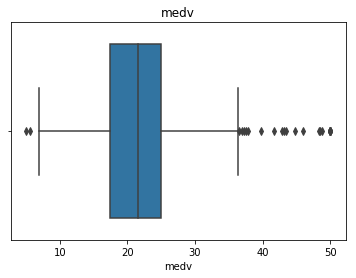

In [11]:
for col in train.columns[1:]:
    plt.figure()
    sns.boxplot(col, data=train)
    plt.title(col)

Using the .distplot() method from the seaborn library, you can plot of the [distribution](https://seaborn.pydata.org/tutorial/distributions.html) of the data

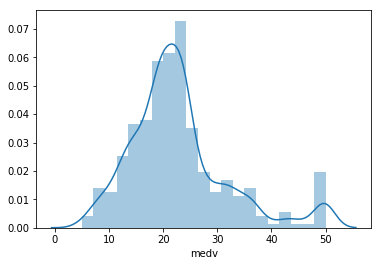

In [12]:
sns.distplot(train["medv"]);

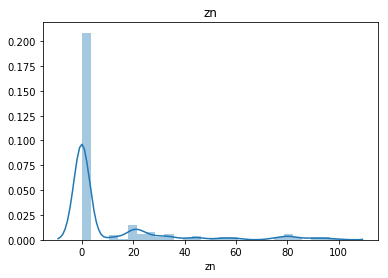

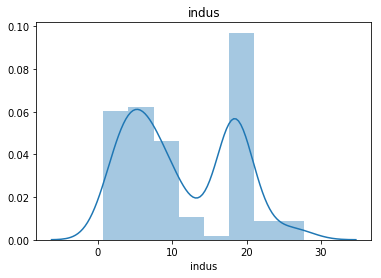

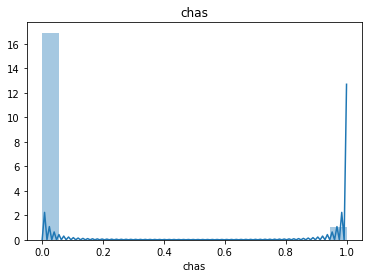

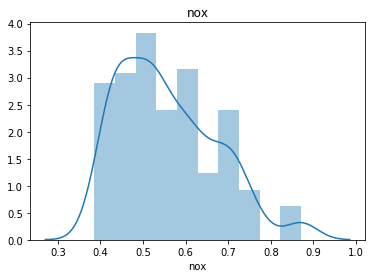

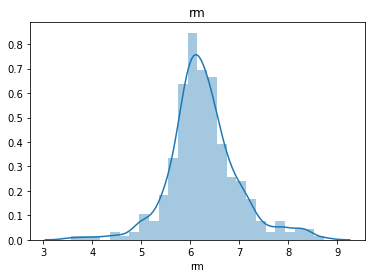

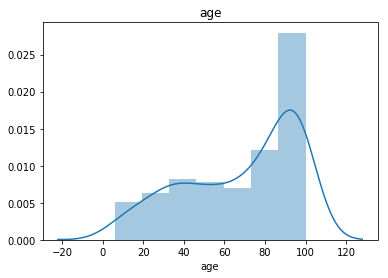

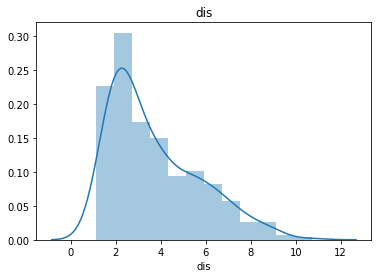

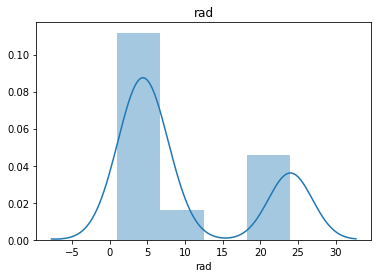

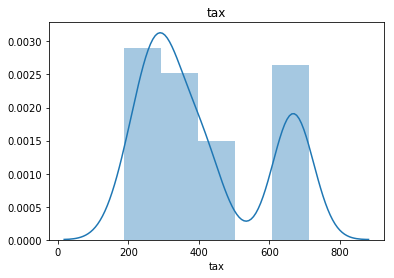

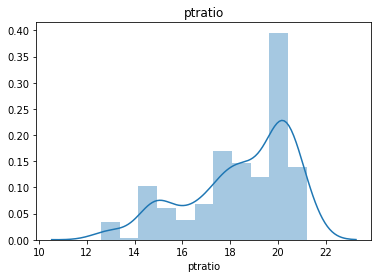

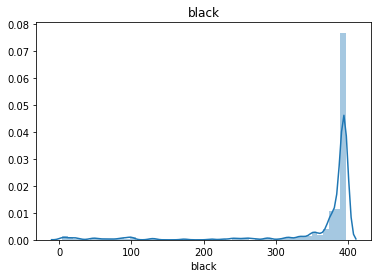

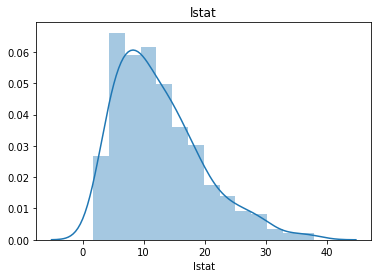

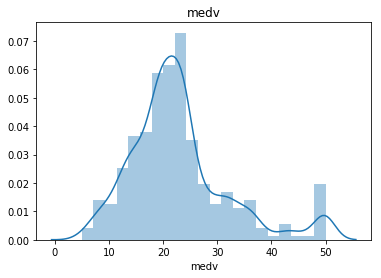

In [13]:
for col in train.columns[1:]:
    plt.figure()
    sns.distplot(train[col])
    plt.title(col)

Now that you have explored and examined the data, it's time to import [scikit](https://scikit-learn.org/stable/) library

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_val, y_train, y_val = train_test_split(train.drop("medv", axis=1), train["medv"], test_size=0.2)

In [16]:
x_train.shape, x_val.shape

((266, 13), (67, 13))

In [17]:
y_train.shape, y_val.shape

((266,), (67,))

In [18]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
65,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270,18.2,396.90,10.59
109,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73
87,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2,392.11,17.19
69,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10


In [19]:
x_val.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
132,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2,396.90,5.39
291,9.32909,0.0,18.10,0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13
139,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402,17.0,384.30,4.45
225,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29
38,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86


In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
model = DecisionTreeRegressor()

In [22]:
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [23]:
y_pred = model.predict(x_val)

In [24]:
y_pred

array([36.2, 17.8, 35.4, 22. , 24.3,  8.4, 23.3, 13.8, 23.2, 23.2, 19.1,
       20.5, 23.1, 17.1, 50. , 13.3, 23.1, 16.1, 50. , 25. , 23.4, 14.3,
       23.9, 13.8, 23.2, 18.4, 20. , 23.1, 33.4, 25. , 43.1,  7.2, 23.9,
       24.5, 50. , 23.8, 16.3, 19.5, 13.3, 28.7, 14.9, 13.8, 19.3, 22.2,
        9.7,  7.2, 19.1, 23.2, 21.4, 20.3, 11.7, 20.3, 24.7, 20.5, 20.4,
       21.2, 25. , 21.4, 20.1, 17.8, 25. , 30.7, 24.3, 18. ,  8.3, 23.6,
       24.7])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
mean_squared_error(y_val, y_pred)

10.201940298507466

Using the .sqrt function from numpy, you can calculcate the mean square root error for the model. 
<br>
The aim is to get as close to 0 as possible for it to be a perfect model. 

In [27]:
np.sqrt(mean_squared_error(y_val, y_pred))

3.194047635603994

In [28]:
r2_score(y_val, y_pred)

0.8661298180203113

In [29]:
test = pd.read_csv("test.csv")

In [30]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [31]:
test.drop("ID", axis=1, inplace=True)

In [32]:
test.shape

(173, 13)

In [33]:
test.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


In [34]:
model.predict(test)

array([32.7, 25. , 19.5, 19.3, 16.6, 19.6, 20.3, 12.7, 14.8, 19.6, 14.5,
       23.2, 23.2, 12.7, 20.3, 20.3, 19.9, 27.9, 19.5, 24.6, 19.9, 25. ,
       19.9, 24.4, 22.5, 18.6, 25. , 21.6, 23.4, 32.5, 48.5, 48.5, 32.7,
       21.4, 19.3, 22.5, 16.2, 16.1, 20.4, 20.3, 15.7, 19.8, 20.8, 17.8,
       17.8, 13.4, 13.4, 13.8, 19.8, 23.8, 23.8, 22.8, 50. , 22.3, 17.5,
       18.7, 30.5, 48.5, 32.7, 32.7, 35.4, 48.5, 23.2, 19.5, 19.3, 23.2,
       23.4, 25. , 20.5, 22.8, 27.5, 50. , 33.4, 33.4, 25. , 26.2, 18.9,
       23.2, 24.4, 37. , 22. , 11.9, 36.4, 50. , 37.9, 29.9, 43.1, 24.4,
       22.5, 31.5, 36.2, 31.2, 26.4, 46. , 24.7, 22. , 36.2, 23.2, 26.2,
       19.8, 34.9, 24.5, 23.9, 23.4, 27.5, 22.5, 23.4, 22.8, 20. , 25. ,
       19.8, 20.3, 11.9, 22.3, 19.5, 23.9, 20.1, 20.6, 32. , 27.9, 23.1,
       23.1, 20.3, 21.7, 35.2, 50. , 27.5, 13.3, 13.3, 19.1, 13.3,  8.8,
        7.2, 17.1, 18. , 17.1, 12.3, 12.8, 11.3, 10.5, 10.5, 13.8, 16.3,
       20.8, 16.3, 16.3,  9.5, 18. , 18.4, 21.9, 12

Now test using a different model to see if you can reduce the mean square root error to as close to zero as possible.
<br>
Zero would be a perfect model. 
<br>
Try to also get the r^2 as close to 100% as possible.